# Geek Weekly - Machine Learning - Decision Trees

# Getting Started
![caption](titanic.jpg)

In [109]:
import numpy as np
import pandas as pd

# RMS Titanic data visualization code 
from titanic_visualizations import survival_stats
from IPython.display import display
import visuals as vs 
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

print("Input file has {} records".format(len(full_data)))

# Print the first few entries of the RMS Titanic data
display(full_data.head())

Input file has 891 records


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

In [110]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(data.head())

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S

# Accuracy Score

In [111]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(len(outcomes), dtype = int)) # assume everyone survived
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 38.38%.


# Making Predictions

In [112]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Predict the survival of 'passenger'
        predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(data)

print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 61.62%.


## Exploring the Data

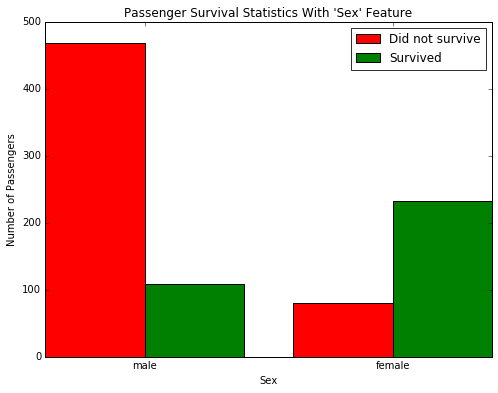

In [113]:
survival_stats(data, outcomes, 'Sex')

In [114]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        predictions.append(0 if passenger['Sex'] == 'male' else 1)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)

print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 78.68%.


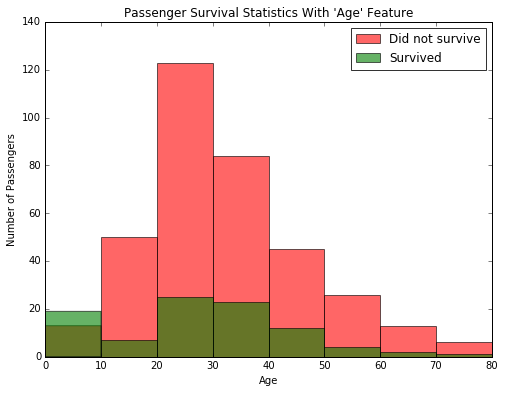

In [115]:
survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

In [116]:
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        predictions.append(1 if passenger['Sex'] == 'female' or passenger['Age'] < 10 else 0)
            
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_2(data)

print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 79.35%.


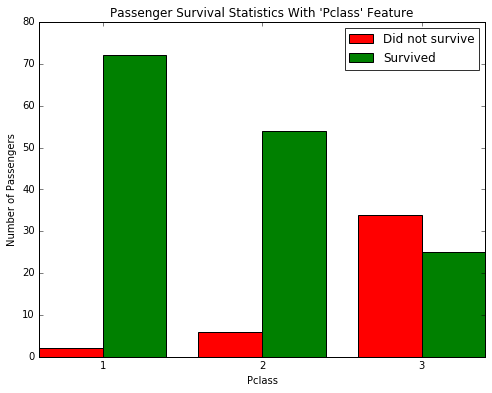

In [117]:
survival_stats(data, outcomes, 'Pclass', ["Sex == 'female'", "Age > 18"])

In [118]:
def predictions_3(data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger['Pclass'] == 3 and passenger['Sex'] == 'female' and passenger['Age'] > 18:
            predictions.append(0)
        else:
            predictions.append(1 if passenger['Sex'] == 'female' or passenger['Age'] < 10 else 0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_3(data)

print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 80.36%.


# Building an Algorithm

In [119]:
display(data.head())

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S

In [120]:
data = data.drop(['Name', 'Ticket', 'Cabin'], axis = 1)
data.ix[data['Sex'] == 'male', 'Sex'] = 0
data.ix[data['Sex'] == 'female', 'Sex'] = 1
data.ix[data['Embarked'] == 'C', 'Embarked'] = 0
data.ix[data['Embarked'] == 'Q', 'Embarked'] = 1
data.ix[data['Embarked'] == 'S', 'Embarked'] = 2
data['Survived'] = outcomes
data = data.dropna()
outcomes = data['Survived']
data = data.drop('Survived', axis = 1)

display(data.head())

PassengerId  Pclass Sex   Age  SibSp  Parch     Fare Embarked
0            1       3   0  22.0      1      0   7.2500        2
1            2       1   1  38.0      1      0  71.2833        0
2            3       3   1  26.0      0      0   7.9250        2
3            4       1   1  35.0      1      0  53.1000        2
4            5       3   0  35.0      0      0   8.0500        2

In [121]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(data, outcomes, test_size=0.2, random_state=42)

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

classifier = DecisionTreeClassifier()

fit = classifier.fit(X_train, y_train)

print("Accuracy of training data: ", fit.score(X_train, y_train) * 100, '%')
print("Accuracy of test data: ", fit.score(X_test, y_test) * 100, '%')

('Accuracy of training data: ', 100.0, '%')
('Accuracy of test data: ', 73.426573426573427, '%')


In [145]:
train_accuracy = {}
test_accuracy = {}

for max_depth in range(1, 20, 3):
    classifier = DecisionTreeClassifier(max_depth=max_depth)
    fit = classifier.fit(X_train, y_train)

    train_score = fit.score(X_train, y_train)
    test_score = fit.score(X_test, y_test)
    
    train_accuracy[max_depth] = train_score
    test_accuracy[max_depth] = test_score
    
    print "--- Max Depth: ", max_depth
    print "Accuracy of training data: ", train_score * 100, '%'
    print "Accuracy of test data: ", test_score * 100, '%'
    print("")

 --- Max Depth:  1
Accuracy of training data:  78.7346221441 %
Accuracy of test data:  74.8251748252 %

--- Max Depth:  4
Accuracy of training data:  84.7100175747 %
Accuracy of test data:  70.6293706294 %

--- Max Depth:  7
Accuracy of training data:  91.0369068541 %
Accuracy of test data:  71.3286713287 %

--- Max Depth:  10
Accuracy of training data:  94.9033391916 %
Accuracy of test data:  68.5314685315 %

--- Max Depth:  13
Accuracy of training data:  97.1880492091 %
Accuracy of test data:  72.7272727273 %

--- Max Depth:  16
Accuracy of training data:  99.1212653779 %
Accuracy of test data:  69.2307692308 %

--- Max Depth:  19
Accuracy of training data:  100.0 %
Accuracy of test data:  72.7272727273 %



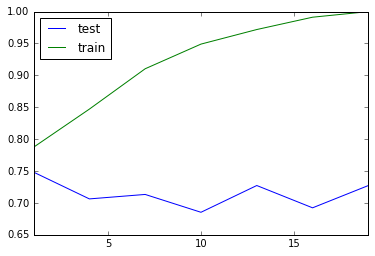

In [158]:
accuracy = pd.DataFrame.from_dict({'train': train_accuracy, 'test': test_accuracy})

accuracy.plot()